In [2]:
import sympy as sy
from sympy import *

def MO(x):
    return (x[0]**2+x[1]**2+x[2]**2)**0.5

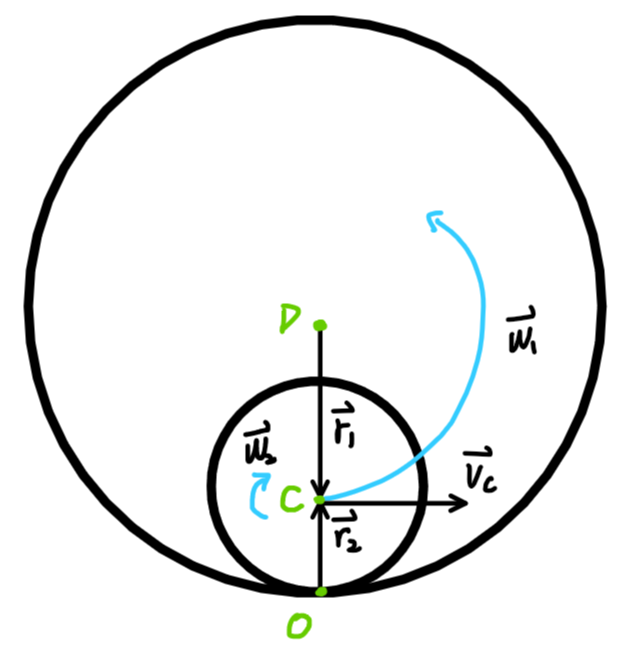

角加速度=0的情况
---
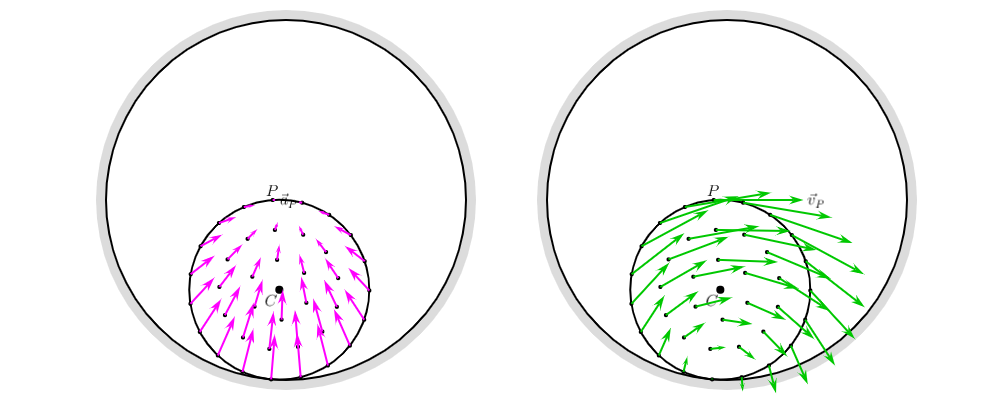

知识重点
---
内外切圆  公式推导  
$\vec v_C=\omega_1 \times \vec r_1$  
$\vec v_C=\omega_2 \times \vec r_2$

$\vec{a}_C=\vec\alpha_2 \times \vec r_2+\vec \omega_1 \times (\vec \omega_1 \times \vec r_1)$ ⭐⭐

$\vec a_Q=\vec \alpha_2 \times \vec r_{CQ}+ \vec \omega_{2} \times(\vec \omega_{2} \times \vec r_{CQ}) +\vec a_C$  
  
主要注意 
1. $O$ 点是有加速度的，而平地上 $O$是没有加速度的
1. $\vec \omega_{1} \times \vec r_1 =\vec \omega_{2} \times \vec r_2$&nbsp;注意：$|\omega_1 \cdot r_1|=|\omega_2 \cdot r_2|$ (符号不一定相同) 
2. $\vec \alpha_{1} \times \vec r_1 =\vec \alpha_{2} \times \vec r_2$&nbsp; &nbsp;注意：$|\alpha_1 \cdot r_1|=|\alpha_2 \cdot r_2|$  (上式求导得)  

| 圆类型 | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;角速度&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;| &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;角加速度&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |  
| :------| :----: | :----: |  
| 内切圆 | $\vec \omega_1 \cdot r_1=-\vec \omega_2 \cdot r_2$ | $\vec \alpha_1 \cdot r_1=-\vec \alpha_2 \cdot r_2$ |  
| 外切圆 | $\vec \omega_1 \cdot r_1=+\vec \omega_2 \cdot r_2$ | $\vec \alpha_1 \cdot r_1=+\vec \alpha_2 \cdot r_2$  |  

&nbsp;  
3. $\vec r_1,\vec r_2 $ 方向与内外有关

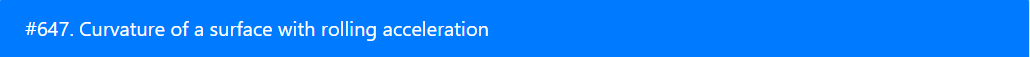

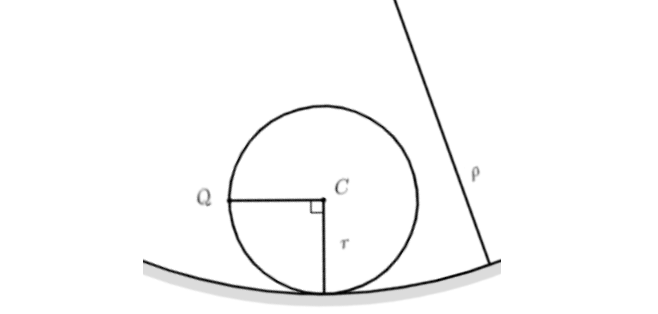

Quiz 思路
---
1.设$r_1,r_2=\rho±r_1，表示 \vec r_{OC},\vec r_{CQ}$

2.计算 $$\vec \omega_2=±\frac{\vec \omega_1 \cdot r_1}{r_2}\,\vec \alpha_2=±\frac{\vec \alpha_1 \cdot r_1}{r_2}$$

3.表示 $\vec \omega_1,\vec \omega_2,\vec \alpha_1,\vec \alpha_2$ 向量形式  
  
4.使用相对加速度计算  
&nbsp;&nbsp;&nbsp;&nbsp;$\vec a_{C/O}=\vec \alpha_1 \times \vec r_{OC}+\vec \omega_1 \times (\vec \omega_1 \times \vec r_{OC})$  
&nbsp;&nbsp;&nbsp;&nbsp;$\vec a_{Q/C}=\vec \alpha_2 \times \vec r_{CQ}+\vec \omega_2 \times (\vec \omega_2 \times \vec r_{CQ})$

In [5]:
#############################################输入数据
r=1
w=-3
al=-1
aQ=11
#############################################
theta=int(input('Q相对于C的角度='))/180*pi

rho=S('rho')
R=rho-r

alpha1=Matrix([0,0,al])
w2=Matrix([0,0,w])
w1=w2*r/R

rDC=Matrix([0,-R,0])
rOC=Matrix([0,r,0])
rCQ=Matrix([r*cos(theta),r*sin(theta),0])

aC=alpha1.cross(rOC)+w1.cross(w1.cross(rDC))
aQ2=alpha1.cross(rCQ)+w2.cross(w2.cross(rCQ))+aC
aQ2=MO(aQ2)

solve([aQ2-aQ])

Q相对于C的角度=180


[{rho: -0.612159062730128}, {rho: 3.51215906273013}]

In [ ]:
###Quiz复习时候写的程序
r1=2
w1=-2 
al1=3
aQ_Mag=11

rho,r2=S('rho,r2')

rMQ=Matrix([-r,r,0])
alpha=Matrix([0,0,al])
omega=Matrix([0,0,w])

#
w2 =-w1*r1/r2       #根据内外切调整
al2=-al1*r1/r2      #根据内外切调整

omega1=Matrix([0,0,w1])
omega2=Matrix([0,0,w2])
alpha1=Matrix([0,0,al1])
alpha2=Matrix([0,0,al2])

rOC=Matrix([0,-r2,0])
rCQ=Matrix([0,-r1,0])  #根据相对位置调整

aOC=alpha2.cross(rOC)+omega2.cross(omega2.cross(rOC))
aQC=alpha1.cross(rCQ)+omega1.cross(omega1.cross(rCQ))

aQ=aOC+aQC

r2=solve([MO(aQ)-aQ_Mag],[r2])[1][0]

r2+r1

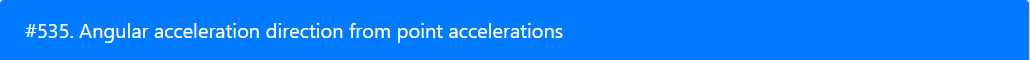

判断旋转方向
---

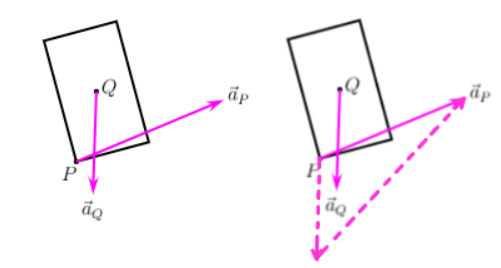

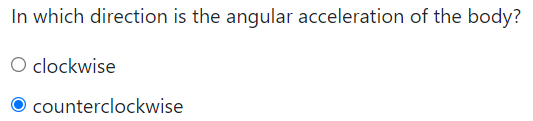

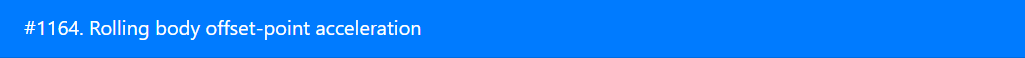

已知 $\alpha, a_Q$ 计算 $\omega$  
已知 $r, a_Q$ 计算$\alpha$ 
  
解题思路  
    $\vec{a}_C=\vec{\alpha} \times \vec{r}_{OC} $  
    $\vec{a}_Q=\vec{a}_C+\alpha \times \vec{r}_{CQ}+\vec{\omega}\times(\vec{\omega} \times \vec{r}_{CQ})     $

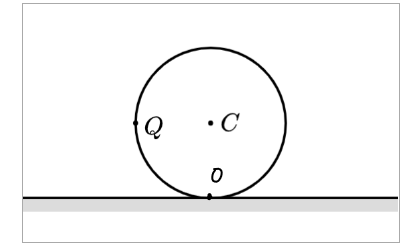

In [6]:
w,r,al=S('w,r,al')

theta=int(input("输入Q相对于O的角度"))/180*pi

#############################初始化
omega=Matrix([0,0,w])
alpha=Matrix([0,0,al])
##############################复制部分
r = 8
aQ = Matrix([ 1, -8,  0])
##############################计算
#判断程序
  
rOC=Matrix([0,r,0])
rCQ=Matrix([r*cos(theta),r*sin(theta),0])

#质心加速度
aC=alpha.cross(rOC)
#相对加速度
aQ2=aC+alpha.cross(rCQ)+omega.cross(omega.cross(rCQ))


#输出结果
ans=solve(aQ-aQ2)[1]
key=list(ans.keys())
print(key[0],'=',float(ans[key[0]]))
print(key[1],'=',float(ans[key[1]]))

输入Q相对于O的角度180
al = 1.0
w = 1.0606601717798212


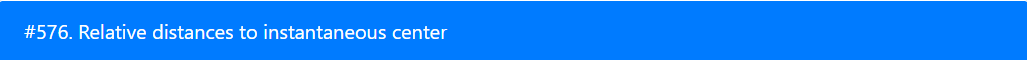

**速度越小越靠近瞬心**

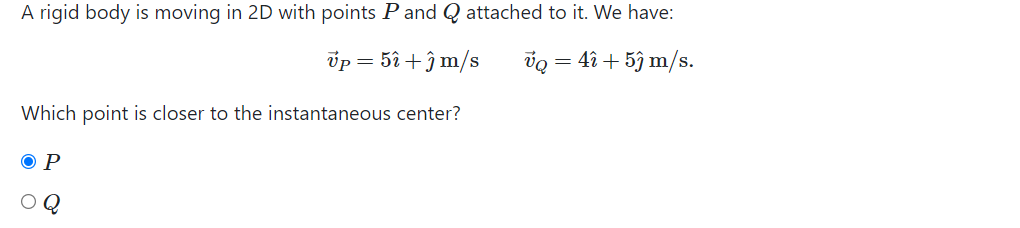

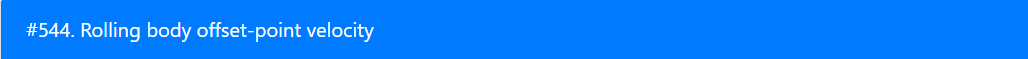

已知 $r, v_Q$ 计算$\omega$   
  
解题思路  
$v_C=\vec{\omega} \times \vec{r}_{OC}$  
$v_Q=v_C+\vec{\omega} \times \vec{r}_{CQ}$

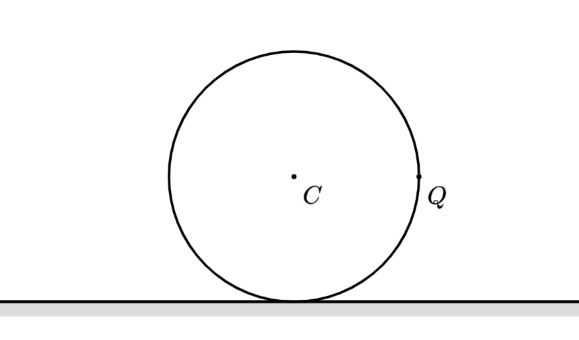

In [120]:
r = 2
vQ = Matrix([-3,  0,  0])
#####################################复制部分
theta=int(input('Q相对于C的角度='))/180*pi

w=S('w')

omega=Matrix([0,0,w])
rOC=Matrix([0,r,0])
rCQ=Matrix([r*cos(theta),r*sin(theta),0])

vC=omega.cross(rOC)
vQ2=vC+omega.cross(rCQ)

float(solve(vQ-vQ2)[w])

Q相对于C的角度=90


0.75

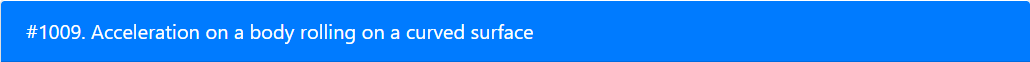

解题思路  
$\vec{a}_C=\vec\alpha \times \vec r_{OC}+\vec \omega_{CD} \times (\vec \omega_{CD} \times \vec r_{DC})$

$\vec a_Q=\vec \alpha \times \vec r_{CQ}+ \vec \omega_{QC} \times(\vec \omega_{QC} \times \vec r_{CQ}) +\vec a_C$  
  
主要注意 $r \cdot \omega_{QC}= R \cdot \omega_{CD}$

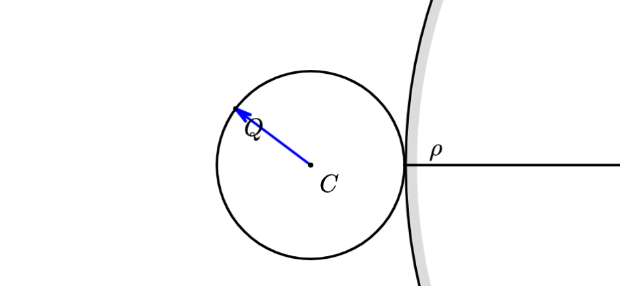

In [8]:
from sympy import *
##################################
rho = 47
omega = Matrix([0, 0, 4])
alpha = Matrix([0, 0, 2])
rCQ = Matrix([-2,  8,  0])
##################################复制部分
theta=int(input('C相对于大圆的角度='))/180*pi
key=(int(input('圆内=1，圆外=2'))-1.5)*2

r=MO(rCQ)
R=key*r+rho

rOC=Matrix([r*cos(theta),r*sin(theta),0])*key     #接触点→C
rDC=Matrix([R*cos(theta),R*sin(theta),0])         #大圆心→C

vC=omega.cross(rOC)

omega2=omega*r/R   #相对大圆的角速度

#计算加速度
aC=alpha.cross(rOC)+omega2.cross(omega2.cross(rDC))
aQ=aC+alpha.cross(rCQ)+omega.cross(omega.cross(rCQ))

aQ

C相对于大圆的角度=90
圆内=1，圆外=21


Matrix([
[ 32.4924225024706],
[-160.074674377087],
[                0]])